<a href="https://colab.research.google.com/github/gabrielfernandezf/py/blob/master/PCA_Merval_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
#Drive permission
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/My Drive/PCA_Merval/raw_data/merval_clean_1.0.xlsx' 
f = open(file_path, "r")
df = pd.read_excel(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  834 non-null    int64         
 1   Date        834 non-null    datetime64[ns]
 2   MERVAL      834 non-null    float64       
 3   BMA         834 non-null    float64       
 4   VALO        834 non-null    float64       
 5   BBAR        834 non-null    float64       
 6   SUPV        834 non-null    float64       
 7   BYMA        834 non-null    float64       
 8   GGAL        834 non-null    float64       
 9   COME        834 non-null    float64       
 10  HARG        834 non-null    float64       
 11  LOMA        834 non-null    float64       
 12  CEPU        834 non-null    float64       
 13  EDN         834 non-null    float64       
 14  TRAN        834 non-null    float64       
 15  PAMP        834 non-null    float64       
 16  TGSU2       834 non-null  

In [5]:
df.head()

,Unnamed: 0,Date,MERVAL,BMA,VALO,BBAR,SUPV,BYMA,GGAL,COME,HARG,LOMA,CEPU,EDN,TRAN,PAMP,TGSU2,TGNO4,CVH,TECO2,IRSA,CTIO,CRES,ALUA,TXAR,YPFD,MIRG,AGRO,FX
0,4183,2017-11-03,27978.33,209.55,5.53,124.50,92.15,240.367,93.20,2.437,66.85,75.75,30.05,39.65,40.25,47.45,71.498,57.95,432.50,118.65,48.143,56.00,38.453,14.50,14.40,433.45,473.15,20.250,17.708531
1,4184,2017-11-07,28120.22,212.40,5.55,122.35,91.00,237.043,94.45,2.375,68.05,74.90,30.50,39.05,40.00,47.15,71.883,58.25,432.75,116.05,48.685,55.30,39.353,15.05,15.15,437.35,480.05,20.250,17.840952
2,4185,2017-11-08,28081.57,213.00,5.34,123.30,89.70,232.156,93.65,2.380,67.45,76.50,30.30,38.65,42.95,46.45,71.498,59.00,424.00,116.50,47.465,55.00,38.311,15.55,14.90,434.75,483.90,19.800,17.436232
3,4186,2017-11-09,27951.54,212.55,5.48,122.95,91.00,226.780,95.45,2.313,67.70,75.50,31.50,38.25,44.10,46.70,70.150,58.85,422.05,116.30,47.555,54.00,37.980,15.10,14.65,423.60,496.10,19.613,17.571797
4,4187,2017-11-10,27080.55,207.35,5.31,121.75,87.55,219.937,92.40,2.137,66.45,74.10,30.90,37.10,43.05,45.35,69.332,57.25,423.00,115.25,44.165,51.95,35.517,14.20,13.95,404.40,488.45,19.350,17.606707


In [6]:
df = df.set_index('Date')
df = df.drop('Unnamed: 0', 1)

In [7]:
df.head()

,MERVAL,BMA,VALO,BBAR,SUPV,BYMA,GGAL,COME,HARG,LOMA,CEPU,EDN,TRAN,PAMP,TGSU2,TGNO4,CVH,TECO2,IRSA,CTIO,CRES,ALUA,TXAR,YPFD,MIRG,AGRO,FX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-03,27978.33,209.55,5.53,124.50,92.15,240.367,93.20,2.437,66.85,75.75,30.05,39.65,40.25,47.45,71.498,57.95,432.50,118.65,48.143,56.00,38.453,14.50,14.40,433.45,473.15,20.250,17.708531
2017-11-07,28120.22,212.40,5.55,122.35,91.00,237.043,94.45,2.375,68.05,74.90,30.50,39.05,40.00,47.15,71.883,58.25,432.75,116.05,48.685,55.30,39.353,15.05,15.15,437.35,480.05,20.250,17.840952
2017-11-08,28081.57,213.00,5.34,123.30,89.70,232.156,93.65,2.380,67.45,76.50,30.30,38.65,42.95,46.45,71.498,59.00,424.00,116.50,47.465,55.00,38.311,15.55,14.90,434.75,483.90,19.800,17.436232
2017-11-09,27951.54,212.55,5.48,122.95,91.00,226.780,95.45,2.313,67.70,75.50,31.50,38.25,44.10,46.70,70.150,58.85,422.05,116.30,47.555,54.00,37.980,15.10,14.65,423.60,496.10,19.613,17.571797
2017-11-10,27080.55,207.35,5.31,121.75,87.55,219.937,92.40,2.137,66.45,74.10,30.90,37.10,43.05,45.35,69.332,57.25,423.00,115.25,44.165,51.95,35.517,14.20,13.95,404.40,488.45,19.350,17.606707


In [ ]:
#Pasar todas las acciones a USD
#Separar Merval y FX del resto de acciones
#Calcular retornos en nuevo DF(?)
#Plotear
#Fit model

In [12]:
cols = df.columns.to_list()

In [13]:
df2 = df.loc[:, cols].div(df['FX'], axis=0)

In [14]:
df2.head()

,MERVAL,BMA,VALO,BBAR,SUPV,BYMA,GGAL,COME,HARG,LOMA,CEPU,EDN,TRAN,PAMP,TGSU2,TGNO4,CVH,TECO2,IRSA,CTIO,CRES,ALUA,TXAR,YPFD,MIRG,AGRO,FX
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-03,1579.935094,11.833280,0.312279,7.030510,5.203707,13.573514,5.263,0.137617,3.775017,4.277599,1.696922,2.239034,2.272916,2.679499,4.037489,3.272434,24.423256,6.700160,2.718633,3.162318,2.171439,0.818814,0.813167,24.476903,26.718760,1.143517,1.0
2017-11-07,1576.161405,11.905194,0.311082,6.857818,5.100625,13.286455,5.294,0.133121,3.814258,4.198206,1.709550,2.188785,2.242033,2.642796,4.029101,3.264960,24.255993,6.504698,2.728834,3.099610,2.205768,0.843565,0.849170,24.513826,26.907196,1.135029,1.0
2017-11-08,1610.529765,12.215942,0.306259,7.071482,5.144460,13.314574,5.371,0.136497,3.868382,4.387416,1.737761,2.216649,2.463262,2.663993,4.100542,3.383759,24.317181,6.681490,2.722205,3.154351,2.197206,0.891821,0.854542,24.933713,27.752556,1.135566,1.0
2017-11-09,1590.704717,12.096088,0.311863,6.997008,5.178753,12.905908,5.432,0.131631,3.852765,4.296658,1.792645,2.176784,2.509704,2.657668,3.992193,3.349117,24.018602,6.618561,2.706325,3.073106,2.161418,0.859332,0.833722,24.106812,28.232742,1.116164,1.0
2017-11-10,1538.081455,11.776762,0.301590,6.914978,4.972537,12.491660,5.248,0.121374,3.774130,4.208623,1.755013,2.107152,2.445091,2.575723,3.937817,3.251602,24.024935,6.545801,2.508419,2.950580,2.017243,0.806511,0.792312,22.968519,27.742268,1.099013,1.0


In [18]:
df['BMA'][0]/df['FX'][0]

11.83327950643777

In [19]:
df2 = df2.drop('FX', 1)
df2.head()

,MERVAL,BMA,VALO,BBAR,SUPV,BYMA,GGAL,COME,HARG,LOMA,CEPU,EDN,TRAN,PAMP,TGSU2,TGNO4,CVH,TECO2,IRSA,CTIO,CRES,ALUA,TXAR,YPFD,MIRG,AGRO
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-03,1579.935094,11.833280,0.312279,7.030510,5.203707,13.573514,5.263,0.137617,3.775017,4.277599,1.696922,2.239034,2.272916,2.679499,4.037489,3.272434,24.423256,6.700160,2.718633,3.162318,2.171439,0.818814,0.813167,24.476903,26.718760,1.143517
2017-11-07,1576.161405,11.905194,0.311082,6.857818,5.100625,13.286455,5.294,0.133121,3.814258,4.198206,1.709550,2.188785,2.242033,2.642796,4.029101,3.264960,24.255993,6.504698,2.728834,3.099610,2.205768,0.843565,0.849170,24.513826,26.907196,1.135029
2017-11-08,1610.529765,12.215942,0.306259,7.071482,5.144460,13.314574,5.371,0.136497,3.868382,4.387416,1.737761,2.216649,2.463262,2.663993,4.100542,3.383759,24.317181,6.681490,2.722205,3.154351,2.197206,0.891821,0.854542,24.933713,27.752556,1.135566
2017-11-09,1590.704717,12.096088,0.311863,6.997008,5.178753,12.905908,5.432,0.131631,3.852765,4.296658,1.792645,2.176784,2.509704,2.657668,3.992193,3.349117,24.018602,6.618561,2.706325,3.073106,2.161418,0.859332,0.833722,24.106812,28.232742,1.116164
2017-11-10,1538.081455,11.776762,0.301590,6.914978,4.972537,12.491660,5.248,0.121374,3.774130,4.208623,1.755013,2.107152,2.445091,2.575723,3.937817,3.251602,24.024935,6.545801,2.508419,2.950580,2.017243,0.806511,0.792312,22.968519,27.742268,1.099013


In [25]:
returns = df2.loc[:, 'BMA':'AGRO'].apply(np.log).diff(1)
returns.head()

,BMA,VALO,BBAR,SUPV,BYMA,GGAL,COME,HARG,LOMA,CEPU,EDN,TRAN,PAMP,TGSU2,TGNO4,CVH,TECO2,IRSA,CTIO,CRES,ALUA,TXAR,YPFD,MIRG,AGRO
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2017-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-07,0.006059,-0.003840,-0.024870,-0.020008,-0.021375,0.005873,-0.033220,0.010341,-0.018735,0.007414,-0.022698,-0.013681,-0.013792,-0.002080,-0.002286,-0.006872,-0.029607,0.003745,-0.020029,0.015686,0.029779,0.043322,0.001507,0.007028,-0.007450
2017-11-08,0.025767,-0.015626,0.030681,0.008557,0.002114,0.014440,0.025049,0.014090,0.044083,0.016367,0.012650,0.094103,0.007989,0.017576,0.035740,0.002519,0.026816,-0.002432,0.017506,-0.003889,0.055629,0.006307,0.016984,0.030934,0.000473
2017-11-09,-0.009860,0.018135,-0.010587,0.006644,-0.031174,0.011293,-0.036300,-0.004045,-0.020903,0.031095,-0.018148,0.018678,-0.002377,-0.026779,-0.010290,-0.012355,-0.009463,-0.005851,-0.026094,-0.016422,-0.037111,-0.024666,-0.033726,0.017154,-0.017234
2017-11-10,-0.026754,-0.033498,-0.011793,-0.040634,-0.032624,-0.034460,-0.081127,-0.020621,-0.020702,-0.021216,-0.032511,-0.026082,-0.031319,-0.013714,-0.029549,0.000264,-0.011054,-0.075939,-0.040687,-0.069033,-0.063438,-0.050946,-0.048370,-0.017525,-0.015485


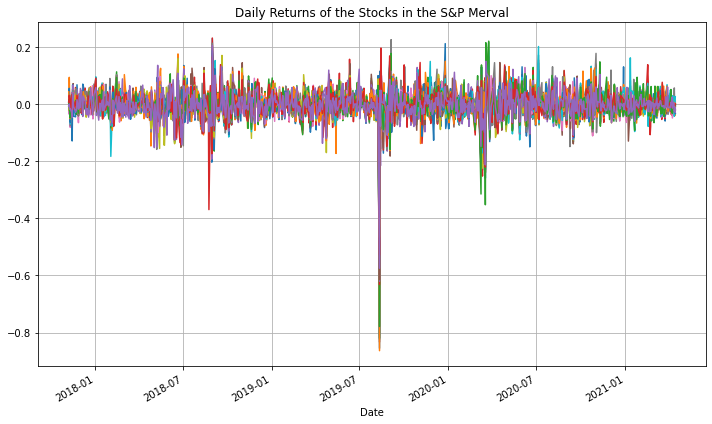

In [29]:
returns.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P Merval')
plt.tight_layout()
fig_path = '/content/drive/My Drive/PCA_Merval/viz/daily_ret.png' 
plt.savefig(fig_path)

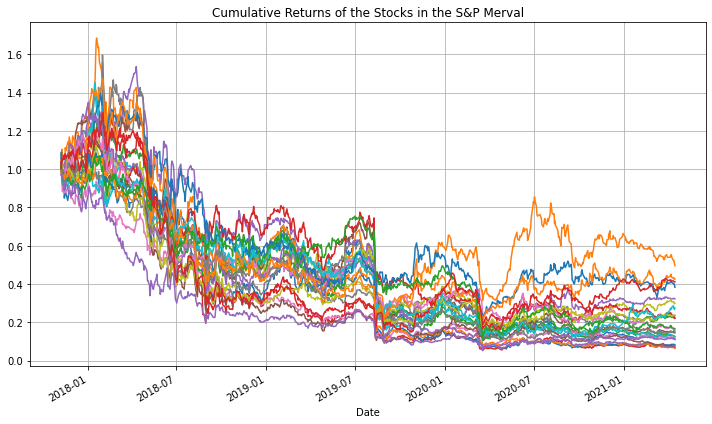

In [30]:
(returns.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P Merval')
plt.tight_layout()
fig_path_cumret = '/content/drive/My Drive/PCA_Merval/viz/cumsum_ret.png' 
plt.savefig(fig_path_cumret)

In [34]:
pca = PCA(1).fit(returns.fillna(0))

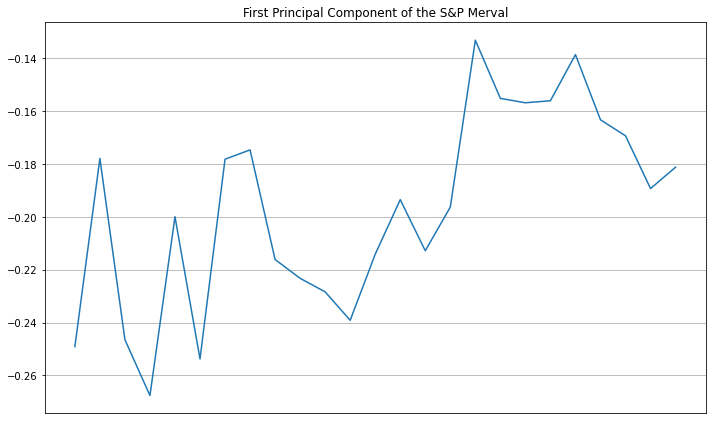

In [35]:
pc1 = pd.Series(index=returns.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P Merval')
plt.tight_layout()
fig_path_pc1 = '/content/drive/My Drive/PCA_Merval/viz/pc1.png' 
plt.savefig(fig_path_pc1)

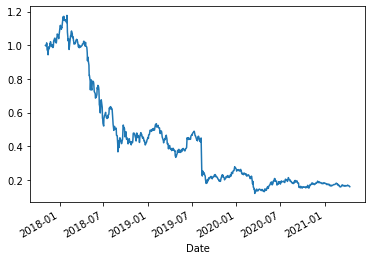

In [36]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*returns).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [39]:
merval = df2['MERVAL']

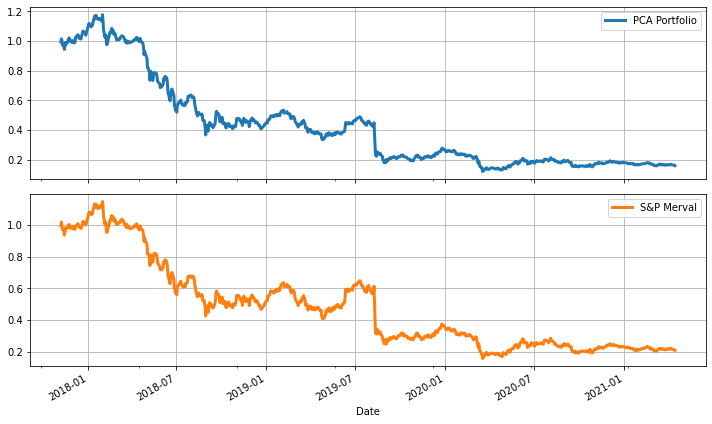

In [40]:
rs_df = pd.concat([myrs, merval.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P Merval"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
fig_path_pca_mer = '/content/drive/My Drive/PCA_Merval/viz/pca_merv.png' 
plt.savefig(fig_path_pca_mer)

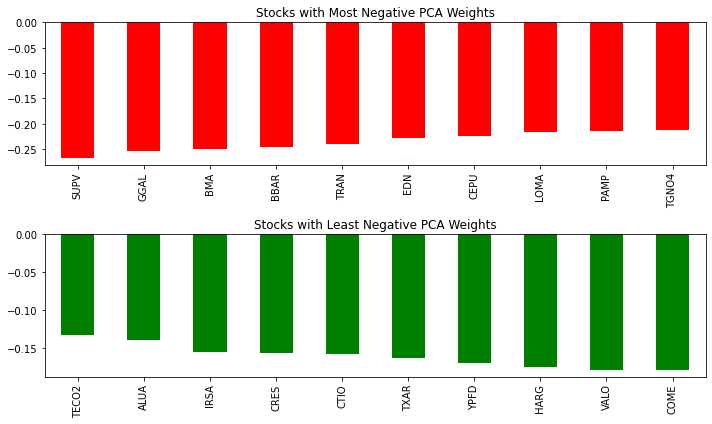

In [43]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='red', grid=False, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='green', grid=False, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
fig_path_pcarank = '/content/drive/My Drive/PCA_Merval/viz/pca_rank.png' 
plt.savefig(fig_path_pcarank)

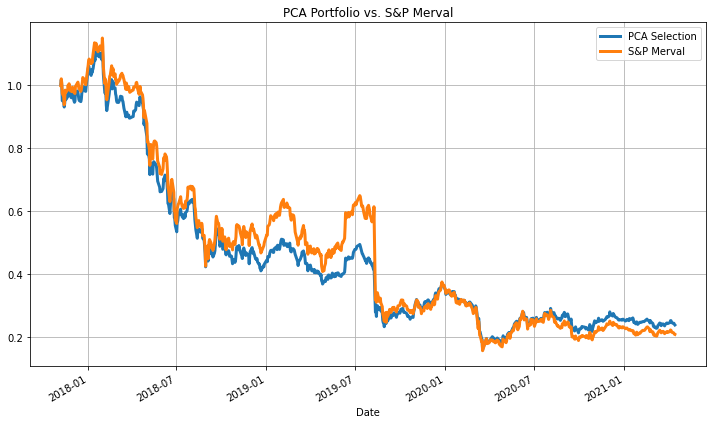

In [47]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = returns[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P Merval')
merval.apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P Merval'])

plt.tight_layout()
fig_path_port_merv = '/content/drive/My Drive/PCA_Merval/viz/port_vs_merv.png' 
plt.savefig(fig_path_port_merv)